In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gbsio import read_from_csv
from partition import SRIPartitioner
from gbs import compute_kl_sri

In [2]:
## The radius of the neighborhood.
scale = "country"

benchmark_levels = {
    'street' : 1,
    'region' : 200,
    'country' : 750,
    'continent': 2500
}

radius = 0.01 #~60km
thres = benchmark_levels.get(scale)

coords, values, raw_values = [], [], []

## Read coordinates and values from CSV file.
filename = 'results_combined_gt.csv'
# filename = 'results_00_gt.csv'
coords_part, values_part, raw_values_part = read_from_csv("data/results_00_gt.csv", value_column="haversine_distance_km", coords_columns=["gt_latitude", "gt_longitude"], thres=thres, return_raw_performance=True)
coords.append(coords_part)
values.append(values_part)
raw_values.append(raw_values_part)


coords = np.concatenate(coords, axis=0)
values = np.concatenate(values)
raw_values = np.concatenate(raw_values)
data = {
    'coords' : coords,
    'values' : values,
    'raw_values' : raw_values,
}

print(coords.shape, values.shape, raw_values.shape)

(50000, 2) (50000,) (50000,)


In [3]:

## Construct a partitioner that extract neighborhood points.
partitioner = SRIPartitioner(coords)


In [4]:
N = coords.shape[0]
radius = 0.2 # a/2 of the rectangle
scale = 0.01 # size of the subdgrid cell
lag = 0.05 # used for distance lag sri - concentric circles rdiff
n_splits = 12 # used for direction lag sri - alpha = 360/n_splits
idx = 8

center = coords[idx]
## Extract neighbood points.
presence_idxs, neighbor_idxs = partitioner.get_direction_sector(idx, radius, n_splits) # partitioner.get_scale_grid(idx, radius, scale) # partitioner.get_distance_lag(idx, radius, lag)

In [5]:
# get the direction lag sri local and global idxs
presence_idxs, neighbor_idxs = partitioner.get_direction_sector(idx, radius, n_splits) # partitioner.get_scale_grid(idx, radius, scale) # partitioner.get_distance_lag(idx, radius, lag)
print(presence_idxs)
print(neighbor_idxs)
print(neighbor_idxs[presence_idxs[0]])

[array([  320,   569,   733,  1572,  1616,  2753,  3086,  3729,  4082,
        4199,  4444,  4951,  6252,  6699,  7348,  8066,  8458,  8979,
        9191, 11150, 11216, 11359, 11651, 12143, 12537, 12564, 12775,
       12962, 13253, 13629, 13907, 14522, 14641, 14663, 16027, 17328,
       18690, 19007, 19413, 19652, 20217, 20939, 21429, 21595, 21724,
       21734, 21989, 22067, 22309, 22907, 23289, 23800, 24817, 24831,
       25073, 26157, 26609, 26957, 28343, 28774, 28912, 30340, 31395,
       32740, 34074, 34698, 35714, 35806, 36155, 36622, 36987, 37195,
       37371, 37582, 38147, 38426, 38724, 38823, 39426, 39474, 40905,
       41319, 41450, 41846, 43170, 44407, 44769, 44833, 45064, 46478,
       46891, 47385, 47946, 48675, 48884, 49562, 49679]), array([  102,   266,   582,   584,   748,  1112,  1117,  1211,  1384,
        1739,  2334,  3061,  3077,  3199,  3308,  3567,  3640,  3775,
        5295,  5420,  5473,  6107,  6381,  6527,  6843,  6891,  6938,
        7354,  7639,  8224,  82

IndexError: index 2753 is out of bounds for axis 0 with size 1736

In [ ]:
local_idx_not_in_neighbor = []
for i in presence_idxs:
    for j in i[0]:
        if j not in neighbor_idxs:
            local_idx_not_in_neighbor.append(j)
            # print(j)
            # break
# neighbor_idxs

print(local_idx_not_in_neighbor)


TypeError: 'numpy.int64' object is not iterable

In [ ]:
presence_idxs.nonzero()

AttributeError: 'list' object has no attribute 'nonzero'

In [ ]:
import random

N = coords.shape[0]
radius = 0.2 # a/2 of the rectangle
scale = 0.01 # size of the subdgrid cell
lag = 0.05 # used for distance lag sri - concentric circles rdiff
n_splits = 12 # used for direction lag sri - alpha = 360/n_splits
idx = 8

center = coords[idx]
## Extract neighbood points.
presence_idxs, neighbor_idxs = partitioner.partitioner.get_scale_grid(idx, radius, scale) # partitioner.get_distance_lag(idx, radius, lag)

presence_points = data.get('coords')[presence_idxs[random.randint(0, len(presence_idxs)-1)]]
neighbor_points = data.get('coords')[neighbor_idxs]

plt.scatter(np.rad2deg(neighbor_points[:, 1]), np.rad2deg(neighbor_points[:, 0]), c='b', s=10)
plt.scatter(np.rad2deg(presence_points[:, 1]), np.rad2deg(presence_points[:, 0]), c='r', s=10)

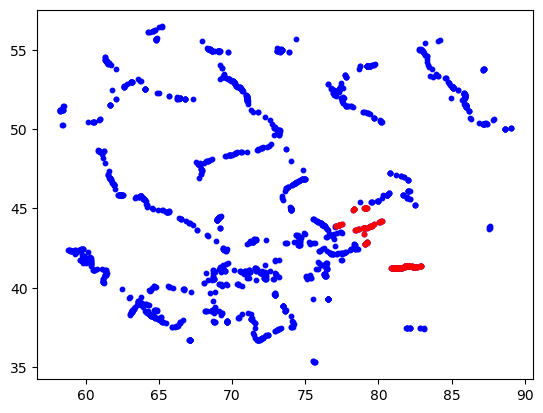

In [ ]:
import random

N = coords.shape[0]
radius = 0.2 # a/2 of the rectangle
scale = 0.01 # size of the subdgrid cell
lag = 0.05 # used for distance lag sri - concentric circles rdiff
n_splits = 12 # used for direction lag sri - alpha = 360/n_splits
idx = 8

center = coords[idx]
## Extract neighbood points.
presence_idxs, neighbor_idxs = partitioner.get_direction_sector(idx, radius, n_splits) # partitioner.get_scale_grid(idx, radius, scale) # partitioner.get_distance_lag(idx, radius, lag)

presence_points = data.get('coords')[presence_idxs[random.randint(0, len(presence_idxs)-1)]]
neighbor_points = data.get('coords')[neighbor_idxs]

plt.scatter(np.rad2deg(neighbor_points[:, 1]), np.rad2deg(neighbor_points[:, 0]), c='b', s=10)
plt.scatter(np.rad2deg(presence_points[:, 1]), np.rad2deg(presence_points[:, 0]), c='r', s=10)

In [ ]:
# len(presence_points)
# len(neighbor_points)

1736

In [54]:
neighbor_idxs[presence_idxs[0][0]]

array([  320,   569,   733,  1572,  1616,  2753,  3086,  3729,  4082,
        4199,  4444,  4951,  6252,  6699,  7348,  8066,  8458,  8979,
        9191, 11150, 11216, 11359, 11651, 12143, 12537, 12564, 12775,
       12962, 13253, 13629, 13907, 14522, 14641, 14663, 16027, 17328,
       18690, 19007, 19413, 19652, 20217, 20939, 21429, 21595, 21724,
       21734, 21989, 22067, 22309, 22907, 23289, 23800, 24817, 24831,
       25073, 26157, 26609, 26957, 28343, 28774, 28912, 30340, 31395,
       32740, 34074, 34698, 35714, 35806, 36155, 36622, 36987, 37195,
       37371, 37582, 38147, 38426, 38724, 38823, 39426, 39474, 40905,
       41319, 41450, 41846, 43170, 44407, 44769, 44833, 45064, 46478,
       46891, 47385, 47946, 48675, 48884, 49562, 49679])

In [26]:
print(len(neighbor_idxs))
print(len(local_idx_not_in_neighbor))

1736
1669


In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.geodesic import Geodesic
from shapely.geometry import Point, Polygon, LineString

def draw_sri(data, centeridx=8, partitioner=None, radius=0.01, type='full'):
    if not partitioner:
        partitioner = SRIPartitioner(coords)
    i = centeridx
    center = data.get('coords')[i]
    # presence_ids = partitioner.get_neighborhood(i, radius)
    # presence_points = data.get('coords')[presence_ids]
    # presence_values = data.get('values')[presence_ids]
    # density = auto_density(radius, presence_points.shape[0])
    # bg_points = generate_background_points(center, radius, density=density)

    # marked_ssi = compute_marked_ssi(presence_points, presence_values, center, radius, density="auto", k=4)
    # unmarked_ssi = compute_unmarked_ssi(presence_points, center, radius, density="auto", k=4)
    # avg_acc = np.mean(np.where(presence_values<0, 0, presence_values))

    # gdf_bg = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lat, lon in np.degrees(bg_points)], crs="EPSG:4326")
    # gdf_presence = gpd.GeoDataFrame(zip(presence_ids, presence_values), columns=['id', 'value'], geometry=[Point(lon, lat) for lat, lon in np.degrees(presence_points)], crs="EPSG:4326")
    # gdf_presence_t = gdf_presence[gdf_presence['value']>0]
    # gdf_presence_f = gdf_presence[gdf_presence['value']<0]

    marker_style_presence_t = dict(color='blue', marker='o', markersize=50,alpha=0.7, label='correct')
    marker_style_presence_f = dict(color='red', marker='o', markersize=50, alpha=0.7, label='incorrect')
    bg_markersize = {'full': 100, 'single': 20}
    marker_style_bg = dict(color='tab:grey',  marker='.', markersize=bg_markersize[type], label='background')

    if type=='full':

        def create_circle(lat_rad, lon_rad, radius, num_points=100):
            """
            Creates a circle (polygon) centered at (lat_rad, lon_rad) with radius in radians.
            """
            # Convert center point to degrees
            lat0 = np.degrees(lat_rad)
            lon0 = np.degrees(lon_rad)

            radius_m = radius * 6378137.0 # constant is from cartopy.geodesic

            # Create a list to store the circle's points
            gd = Geodesic()
            circle_points = gd.circle(lon0, lat0, radius_m, num_points) #63710 is the radius of Sphere (earth) in meters
            
            # Create a polygon from the generated circle points
            return Polygon(circle_points).boundary
        
        def calculate_line_length_km(line):
            """
            Calculate the geodesic length of a LineString in EPSG:4326 using pyproj.
            """
            transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
            
            # Transform the LineString to a projected coordinate system
            line_projected = LineString([transformer.transform(x, y) for x, y in line.coords])
            
            # Calculate length in meters and convert to km
            return round(line_projected.length / 1000)  # Convert meters to km

        # Define centerpoint in radians
        lat_rad_center, lon_rad_center = center   # Example longitude in radians (~60 degrees)

        # Generate the circle polygon
        circle_polygon = create_circle(lat_rad_center, lon_rad_center, radius)

        # Create a GeoDataFrame
        gdf_circle = gpd.GeoDataFrame(geometry=[circle_polygon], crs="EPSG:4326")

        # Create a GeoDataFrame for centerpoint
        center_point = Point(np.degrees(lon_rad_center), np.degrees(lat_rad_center))
        center_gdf = gpd.GeoDataFrame(geometry=[Point(np.degrees(lon_rad_center), np.degrees(lat_rad_center))], crs="EPSG:4326")

        # Compute the edge point
        # edge_lat = np.degrees(lat_rad_center)
        # edge_lon = np.degrees(lon_rad_center + radius)
        r_m = radius * 6371000
        edge_point = Geodesic().direct(center_point.xy, [90], [r_m])[0]
        edge_point = Point(edge_point[0], edge_point[1])


        # Create line geometry from center to edge
        from shapely.geometry import LineString
        arrow_line = LineString([center_point, edge_point])
        line_gdf = gpd.GeoDataFrame(geometry=[arrow_line], crs="EPSG:4326")

        # Set up subplots
        fig = plt.figure(figsize=(12, 12))
        gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
        (ax1, ax2), (ax3, ax4) = gs.subplots(sharex='all', sharey='all')
        axes =  [ax1, ax2, ax3, ax4]

        # set up styles
        # patch_style = dict(color="white", alpha=0.9, edgecolor="black")
        patch_style = dict(color="black", alpha=1)
        marker_style_center = dict(color='tab:red', linestyle=':', marker='o', markersize=100)

        gdf_circle.plot(ax=ax1, **patch_style)  # Circle
        line_gdf.plot(ax=ax1, color='black', linestyle='--', linewidth=1, alpha=0.8, zorder=1)  # Arrow line
        center_gdf.plot(ax=ax1, **marker_style_center)  # Center point
        ax1.text(
            np.degrees(lon_rad_center + radius/2),
            np.degrees(lat_rad_center + 0.0001),
            f'{radius}rad≈{round(Geodesic().geometry_length(arrow_line)/1000,2)}km',
            # f'{radius}rad≈{round(np.degrees(radius),2)}°≈{calculate_line_length_km(arrow_line)}km',
            horizontalalignment='center',
            verticalalignment='bottom',
            )

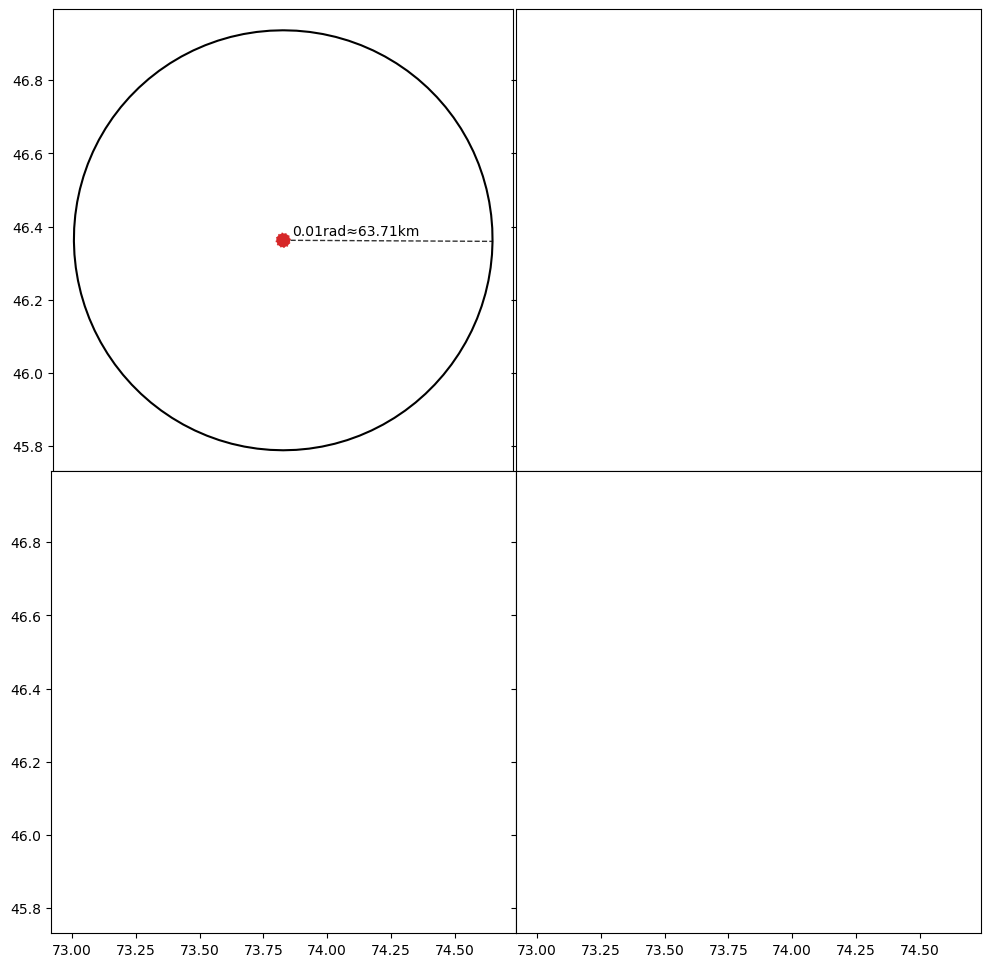

In [19]:
draw_sri(data, centeridx=8, partitioner=partitioner, radius=0.01, type='full')

/tmp/ipykernel_1128883/3246731953.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


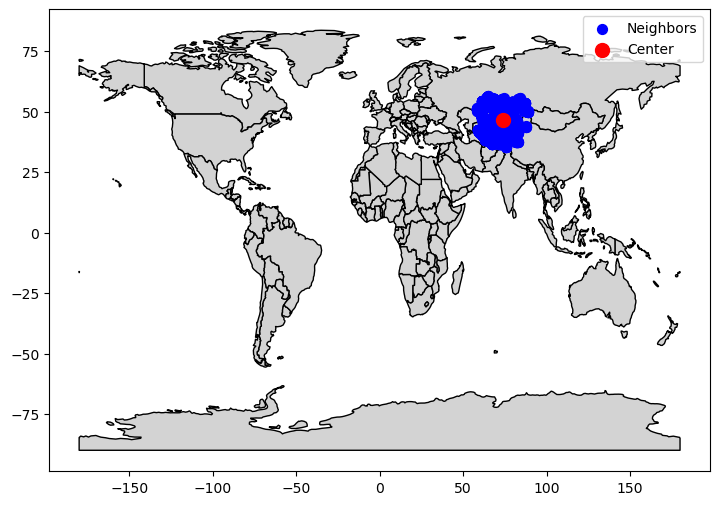

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'center', 'coords', and 'neighbor_idxs' are defined and in radians.
# Convert center to degrees and create a GeoDataFrame
centerpoint = Point(np.rad2deg(center[1]), np.rad2deg(center[0]))
gdf_center = gpd.GeoDataFrame(geometry=[centerpoint], crs="EPSG:4326")

# Create GeoDataFrame for neighbor points (converted to degrees)
neighbors = [Point(np.rad2deg(coords[i][1]), np.rad2deg(coords[i][0])) for i in neighbor_idxs]
gdf_neighbors = gpd.GeoDataFrame(geometry=neighbors, crs="EPSG:4326")

# Load world countries from GeoPandas' built-in dataset (Natural Earth)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the world countries as background
world.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot neighbor points in blue
gdf_neighbors.plot(ax=ax, color="blue", markersize=50, label="Neighbors")

# Plot the center point in red
gdf_center.plot(ax=ax, color="red", markersize=100, label="Center")

# Add a legend and show the plot
plt.legend()
plt.show()

In [ ]:

local_values_list = []
for idxs in presence_idxs:
    local_values_list.append(values[idxs])

neighbor_values = values[neighbor_idxs]

sris, weights = compute_kl_sri(local_values_list, neighbor_values, bins=2)

total_sris = np.sum(sris * weights)
total_weights = neighbor_values.shape[0] / N
print(total_sris, total_weights)

0.06651172642299336 0.15934


In [ ]:

total_sris, total_weights = [], []
## The index of the center point to evaluate.
for idx in range(N):
    center = coords[idx]

    ## Extract neighbood points.
    presence_idxs, neighbor_idxs = partitioner.get_direction_sector(idx, radius, n_splits) # partitioner.get_scale_grid(idx, radius, scale) # partitioner.get_distance_lag(idx, radius, lag)
    local_values_list = []
    for idxs in presence_idxs:
        local_values_list.append(values[idxs])

    neighbor_values = values[neighbor_idxs]

    sris, weights = compute_kl_sri(local_values_list, neighbor_values, bins=2)

    total_sris.append(np.sum(sris * weights))
    total_weights.append(neighbor_values.shape[0] / N)

print(np.sum(np.array(total_sris) * np.array(total_weights)))


/home/imajic/pcloud/01_Projects/02_papers/2025_zhangyu_geobias_tools_GIScience/PyGBS/utils/geometry.py:22: RuntimeWarning: invalid value encountered in arcsin
  lat = np.arcsin(xyzs[:, 2])


KeyboardInterrupt: 